In [1]:
import numpy as np
import torch
from PIL import Image
import pandas as pd
import os
torch.manual_seed(0)

In [2]:
import matplotlib.pyplot as plt

In [3]:
from glob import glob

In [4]:
# import zipfile

In [5]:
# with zipfile.ZipFile("/scratch/scratch6/akansh12/DeepEXrays/data/data_256/Vin_big_dataCXR.zip", 'r') as zip_ref:
#     zip_ref.extractall("/scratch/scratch6/akansh12/DeepEXrays/data/data_256/")

In [6]:
# orig_ann = pd.read_csv("/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/annotations/annotations_train.csv")
# orig_ann.iloc[:,2] = 1*(orig_ann['class_name'] != 'No finding').values
# A = orig_ann.groupby('image_id').sum()
# A['class_name'] = 1* (A['class_name'] > 0).values
# A = A.drop(['x_min','y_min','x_max','y_max'], axis = 1)
# A.to_csv("/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Data/Processed/normalvsAbbnormal.csv")
ann = pd.read_csv("/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Data/Processed/normalvsAbbnormal.csv")

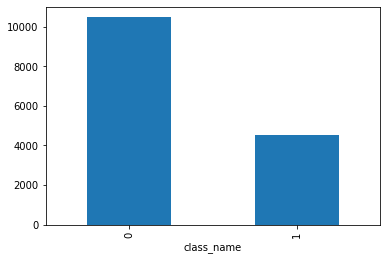

In [7]:
ann.groupby(['class_name']).count().plot(kind = 'bar', legend = False)

In [8]:
ann.groupby(['class_name']).count()

,image_id
class_name,
0,10478
1,4522


#### Visualization of the images

In [9]:
images_path = "/scratch/scratch6/akansh12/DeepEXrays/data/data_256/train/"

In [10]:
ann[ann.class_name == 1].reset_index(drop = True)['image_id'].values[0]

'0005e8e3701dfb1dd93d53e2ff537b6e'

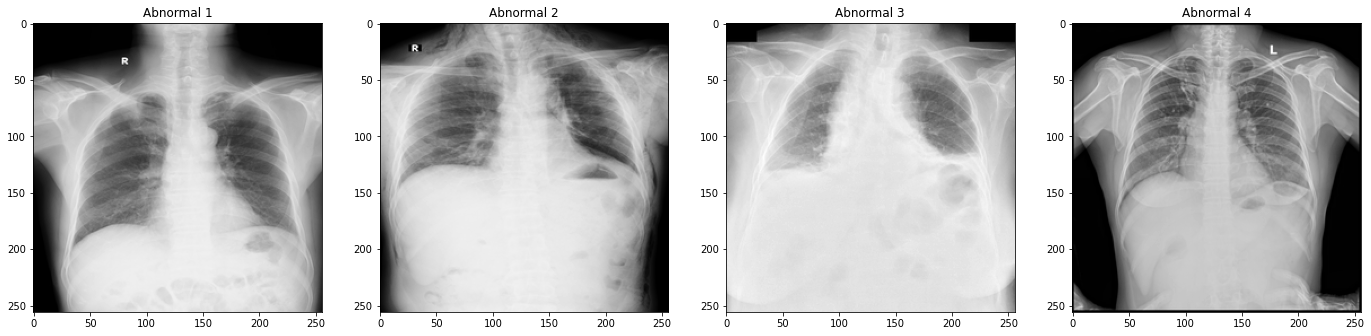

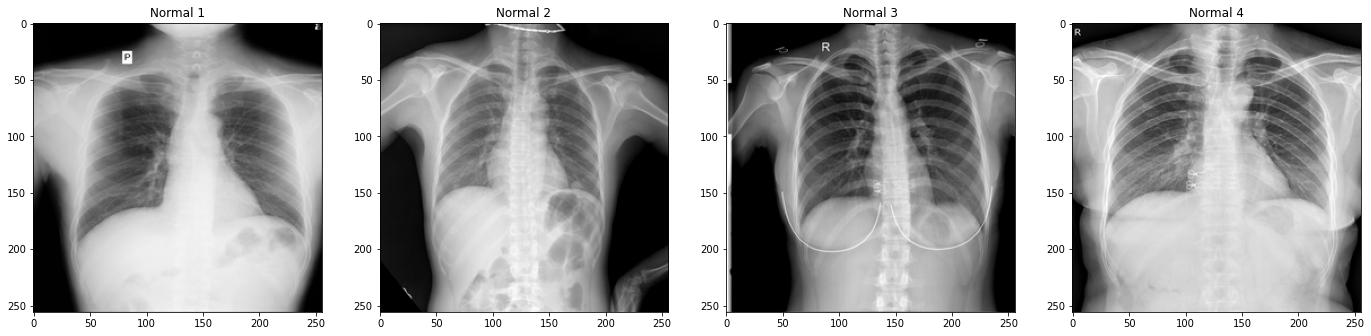

In [11]:
plt.figure(figsize=(30,30)) 
for i in range(1,5):
    plt.subplot(1,5,i,)
    plt.imshow(plt.imread((os.path.join(images_path, ann[ann.class_name == 1].reset_index(drop = True)['image_id'].values[i]+".png"))), cmap = 'gray')
    plt.title(f"Abnormal {i}")
plt.figure(figsize=(30,30)) 
for i in range(1,5):
    plt.subplot(1,5,i,)
    plt.imshow(plt.imread((os.path.join(images_path, ann[ann.class_name == 0].reset_index(drop = True)['image_id'].values[i]+".png"))), cmap = 'gray')
    plt.title(f"Normal {i}")

In [13]:
ann

,image_id,class_name
0,000434271f63a053c4128a0ba6352c7f,0
1,00053190460d56c53cc3e57321387478,0
2,0005e8e3701dfb1dd93d53e2ff537b6e,1
3,0006e0a85696f6bb578e84fafa9a5607,0
4,0007d316f756b3fa0baea2ff514ce945,1
...,...,...
14995,ffe6f9fe648a7ec29a50feb92d6c15a4,1
14996,ffea246f04196af602c7dc123e5e48fc,0
14997,ffeffc54594debf3716d6fcd2402a99f,1
14998,fff0f82159f9083f3dd1f8967fc54f6a,0


In [17]:
!ls /scratch/scratch6/akansh12/DeepEXrays/data/data_256/train

000434271f63a053c4128a0ba6352c7f.png  8010ca3580d86b532fe5f73ef9ff2c49.png
00053190460d56c53cc3e57321387478.png  80116e8bcbcaee5123226ea66638d8bc.png
0005e8e3701dfb1dd93d53e2ff537b6e.png  8015e5edbf16541fef78e6f8859764e4.png
0006e0a85696f6bb578e84fafa9a5607.png  80234017eb6caeada9e14d421eb0b8f8.png
0007d316f756b3fa0baea2ff514ce945.png  802d38d25aa72427102b3b92741b690b.png
000ae00eb3942d27e0b97903dd563a6e.png  803179ef55f8ecf356363cf194b4ff33.png
000d68e42b71d3eac10ccc077aba07c1.png  803331e2555f23a89598d9ed98cdee2a.png
00150343289f317a0ad5629d5b7d9ef9.png  8036ddc6d564439af50497faef05eec3.png
00176f7e1b1cb835123f95960b9a9efd.png  8038119e98919b526752c90afd76de6f.png
001d127bad87592efe45a5c7678f8b8d.png  803c1790b27119f7a38f2959198392cf.png
0021df30f3fddef551eb3df4354b1d06.png  803d21fc5fa799645ca429e655d19d59.png
00291f7aff0123ea76a59998effef229.png  803e047ce22c14175d0631e947ed1599.png
0032c6091dc8f1b1245fc2f5f45458fa.png  804638e9e4b21d90bf768b24a4ac1249.png
003cfe5ce5c0ec5163138eb3b

7339f20488fdc162a8b06c2d8c887277.png  f1cc6ecd5562c49f2c25d539722fa074.png
733f83c5b7f8f64a2de77404f64fe682.png  f1d1d044621a14cf86416b00c84139dc.png
7341eae9f319b13214ef1d1e8a0f4dd1.png  f1d1e5089e66fc256f08e621b5dcc9bf.png
73430dbf21167400a59e61f1d83e58fe.png  f1d5d21120f5370c55efc2ab3d2db8bc.png
73461c12a3a579574df0723071c9d3b9.png  f1da5e509f8a55be3ac43a1b0034ca77.png
7346308962a682d3671080d546e6fbdb.png  f1dd9b481aae4ba412e5fbea06215f53.png
734bbd50e6a2265ae0092510852c9c24.png  f1dfc3bfb919da31d848eda5a20a8258.png
735023a2b17a5222636abc2784772804.png  f1e06b99689d0e62ee0d9967a2c9d711.png
7355afc2a3a775378d54578397734408.png  f1e4056384e1926c3ae33882e0dc00cb.png
7355e471b8ff4a26f7b7a871ef3f14ce.png  f1e7feabd0d43dc3d823995002eb6cd7.png
7364d14935061616a0eb887bc6682f46.png  f1ece4212015e746f3d90a95feb17546.png
736548ed94e659b342a15a4b32e71a1f.png  f1ed2d380bf23214b0522e753035545c.png
73657926e9a287c7647b0be6314b9416.png  f1f2e5d1b29b69b45979a8c295c20387.png
7366d59e58387db1fa9d1bd98

In [18]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import pandas as pd
import torchvision.transforms as transforms
import os
torch.manual_seed(3407)

In [71]:
from tqdm.notebook import tqdm

In [32]:
class vindata(Dataset):
    def __init__(self, data_dir,label_path,transform, data_type = "train"):
        path2data = os.path.join(data_dir, data_type)
        
        filenames = os.listdir(path2data)
        self.full_filenames = [os.path.join(path2data,f) for f in filenames]
        labels_df = pd.read_csv(label_path)
        labels_df.set_index("image_id", inplace = True)
        
        self.labels = [labels_df.loc[filename[:-4]].values[0] for filename in filenames]
        
        self.transform = transform
        
    def __len__(self):
        return len(self.full_filenames)
    
    def __getitem__(self, idx):
        image = Image.open(self.full_filenames[idx])
        image = self.transform(image)
        return image, self.labels[idx]

In [33]:
data_transformer = transforms.Compose([transforms.ToTensor()])

In [34]:
dataset = vindata("/scratch/scratch6/akansh12/DeepEXrays/data/data_256/","/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Data/Processed/normalvsAbbnormal.csv",
                 transform = data_transformer, data_type = "train")

In [47]:
### Spliting the dataset randomly
from torch.utils.data import random_split
len_vindata = len(dataset)
len_train = 0.8*len_vindata
len_val = len_vindata - len_train

In [51]:
train_ds, val_ds = random_split(dataset, [int(len_train), int(len_val)])
print("train dataset length:", len(train_ds))
print("validation dataset length:", len(val_ds))

train dataset length: 12000
validation dataset length: 3000


In [52]:
for x,y in train_ds:
    print(x.shape,y)
    break

torch.Size([1, 256, 256]) 1


In [68]:
def get_mean_std(loader):
    channels_sum, channels_squared_sum, num_batches = 0,0,0
    
    for data,_ in tqdm(loader):
        channels_sum += torch.mean(data, dim = [0,2,3])
        channels_squared_sum += torch.mean(data**2, dim = [0,2,3])
        num_batches += 1
        
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches - mean**2)**0.5
    
    return mean, std

In [69]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

In [72]:
get_mean_std(train_dl)

(tensor([0.5492]), tensor([0.2679]))

In [74]:
data_transforms = {
    
    'train': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop((254,254)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((-30,30)),
        transforms.ToTensor(),
        transforms.Normalize([0.5492,0.5492,0.5492],[0.2679, 0.2679, 0.2679])
        
    ]),
    
    'valid' : transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5492,0.5492,0.5492],[0.2679, 0.2679, 0.2679])
    ])
    
    
}